<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_<br>
_Updated: B Rhodes (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb. This is a pandas project, with some visualizations.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

Explain your work where appropriate and be sure to comment any code you write.

**Grading:** For full credit you are required to answer all questions in the Basic, Intermediate and Advanced sections. You can get extra credit for completing all optional questions in these sections. The Bonus question is optional for everyone, so if you do only the Basic, Intermediate and Advanced sections you will get full credit.

## Basic level

In [1]:
#imports pandas and matplotlib (don't forget inline magic for matplotlib)
import pandas as pd 
import matplotlib.pyplot as plt


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
# data file is on path 'data/imdb_1000.csv' 
prod_df = pd.read_csv(r'C:/Users/mharding/Documents/GitHub/Intuit-data-science/unit-2-project/data/imdb_1000.csv')
prod_df.head(4)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


#### Check the number of rows and columns.

In [3]:
# Answer:
print(len(prod_df))
print(len(prod_df.columns))

979
6


#### Check the data type of each column.

In [4]:
# Answer:
prod_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
avg_duration = prod_df[["duration"]].mean()
print(avg_duration)

duration    120.979571
dtype: float64


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [15]:
# Answer:
prod_df2 = prod_df.sort_values(['duration'])
with pd.option_context('display.max_rows',6):
    print(prod_df2)


     star_rating                        title content_rating    genre  \
389          8.0                       Freaks        UNRATED    Drama   
338          8.0          Battleship Potemkin        UNRATED  History   
258          8.1  The Cabinet of Dr. Caligari        UNRATED    Crime   
..           ...                          ...            ...      ...   
78           8.4  Once Upon a Time in America              R    Crime   
157          8.2           Gone with the Wind              G    Drama   
476          7.8                       Hamlet          PG-13    Drama   

     duration                                        actors_list  
389        64  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
338        66  [u'Aleksandr Antonov', u'Vladimir Barsky', u'G...  
258        67  [u'Werner Krauss', u'Conrad Veidt', u'Friedric...  
..        ...                                                ...  
78        229  [u'Robert De Niro', u'James Woods', u'Elizabet...  
157       238

#### Create a histogram of duration, choosing an "appropriate" number of bins.

Text(0.5, 0, 'Duration')

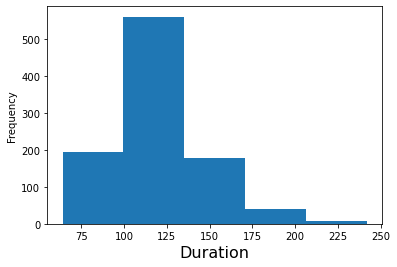

In [16]:
# Answer:
ax = prod_df2.duration.plot(kind='hist', bins=5);
ax.set_xlabel('Duration', fontsize=16)


#### Use a box plot to display that same data.

<AxesSubplot:>

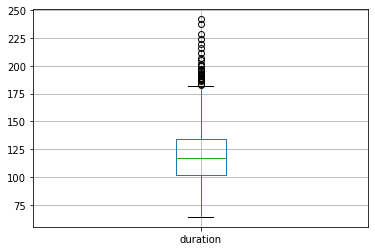

In [17]:
# Answer:
prod_df[["duration"]].boxplot()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [18]:
# Answer:
prod_df.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Movies')

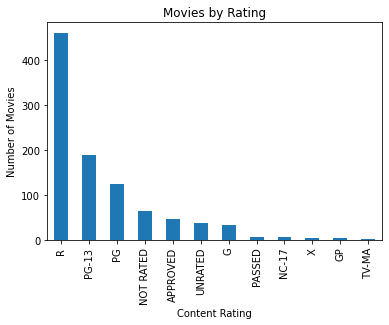

In [19]:
# Answer:
prod_df.content_rating.value_counts().plot(kind='bar', title='Movies by Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [24]:
# Answer:
prod_df.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
prod_df.head(6)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [26]:
# Answer:
prod_df.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)
prod_df.tail(10)

,star_rating,title,content_rating,genre,duration,actors_list
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
971,7.4,Death at a Funeral,R,Comedy,90,"[u'Matthew Macfadyen', u'Peter Dinklage', u'Ew..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


#### Count the number of missing values in each column.

In [28]:
# Answer:
prod_df.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values. Explain your approach.

In [31]:
# Answer:
prod_df[prod_df.content_rating.isnull()]
prod_df.content_rating.fillna('UNRATED', inplace=True)
#if there is no rating we would need to put unrated. I do not have enough information to determine what rating to put it in.

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [34]:
# Answer:
#prod_df[prod_df.duration >= 120].star_rating.mean()
#7.94 
prod_df[prod_df.duration < 120].star_rating.mean() #7.83 they are about the same but lower does have a higher star average

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='star_rating', ylabel='duration'>

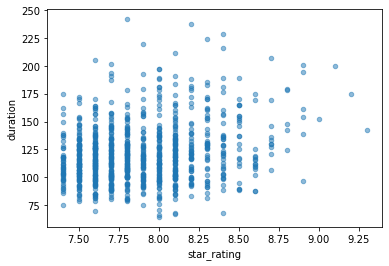

In [36]:
# Answer:
prod_df.plot(kind='scatter', x='star_rating', y='duration', alpha=0.5)

#### Calculate the average duration for each genre.

In [37]:
# Answer:
prod_df.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'NC-17'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'UNRATED'}>]], dtype=object)

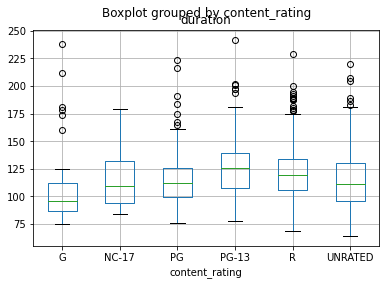

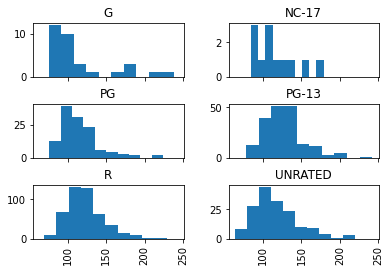

In [39]:
# Answer:
prod_df.boxplot(column='duration', by='content_rating')
prod_df.duration.hist(by=prod_df.content_rating, sharex=True)

#### Determine the top rated movie (by star rating) for each genre.

In [43]:
# Answer:
prod_df.groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [44]:
# Answer:
dup_titles = prod_df[prod_df.title.duplicated()].title
prod_df[prod_df.title.isin(dup_titles)]
#only one cames back as duplicate The Girl with the Dragon Tattoo

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [45]:
# Answer:
prod_df.genre.value_counts()
genres_df = ['Drama', 'Horror', 'Mystery', 'Action', 'Adventure', 'Crime', 'Biography', 'Animation']
prod_df[prod_df.genre.isin(genres_df)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [46]:
# Answer:
genre_counts = prod_df.genre.value_counts()
top_genres = genre_counts[genre_counts >= 10].index
prod_df[prod_df.genre.isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [47]:
# Answer:
prod_df.groupby('genre').star_rating.mean()[prod_df.genre.value_counts() >=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!